In [1]:
import os
import pandas as pd
import sys

In [2]:
os.chdir("/mnt")
ddir = f"/mnt/c/Users/youzh/Documents/My documents(not synced)/sP_Workflow"
data_sac = f"{ddir}/Download/SAC"
wdir = f"{ddir}/Download/Verified"
jdir = f"{ddir}/judge"
os.getcwd()

'/mnt'

In [3]:
hdir = "/home/youzhi/python-projects/sp-project"
sys.path.insert(0, f'{hdir}/code')
from autofilter import *
from helperFuncs import *

no predicted sPn arrival
[14.103, 0.4, 17.5, 16.8, 0.4, 'nan', 0.3, 'nan']
auto_filter


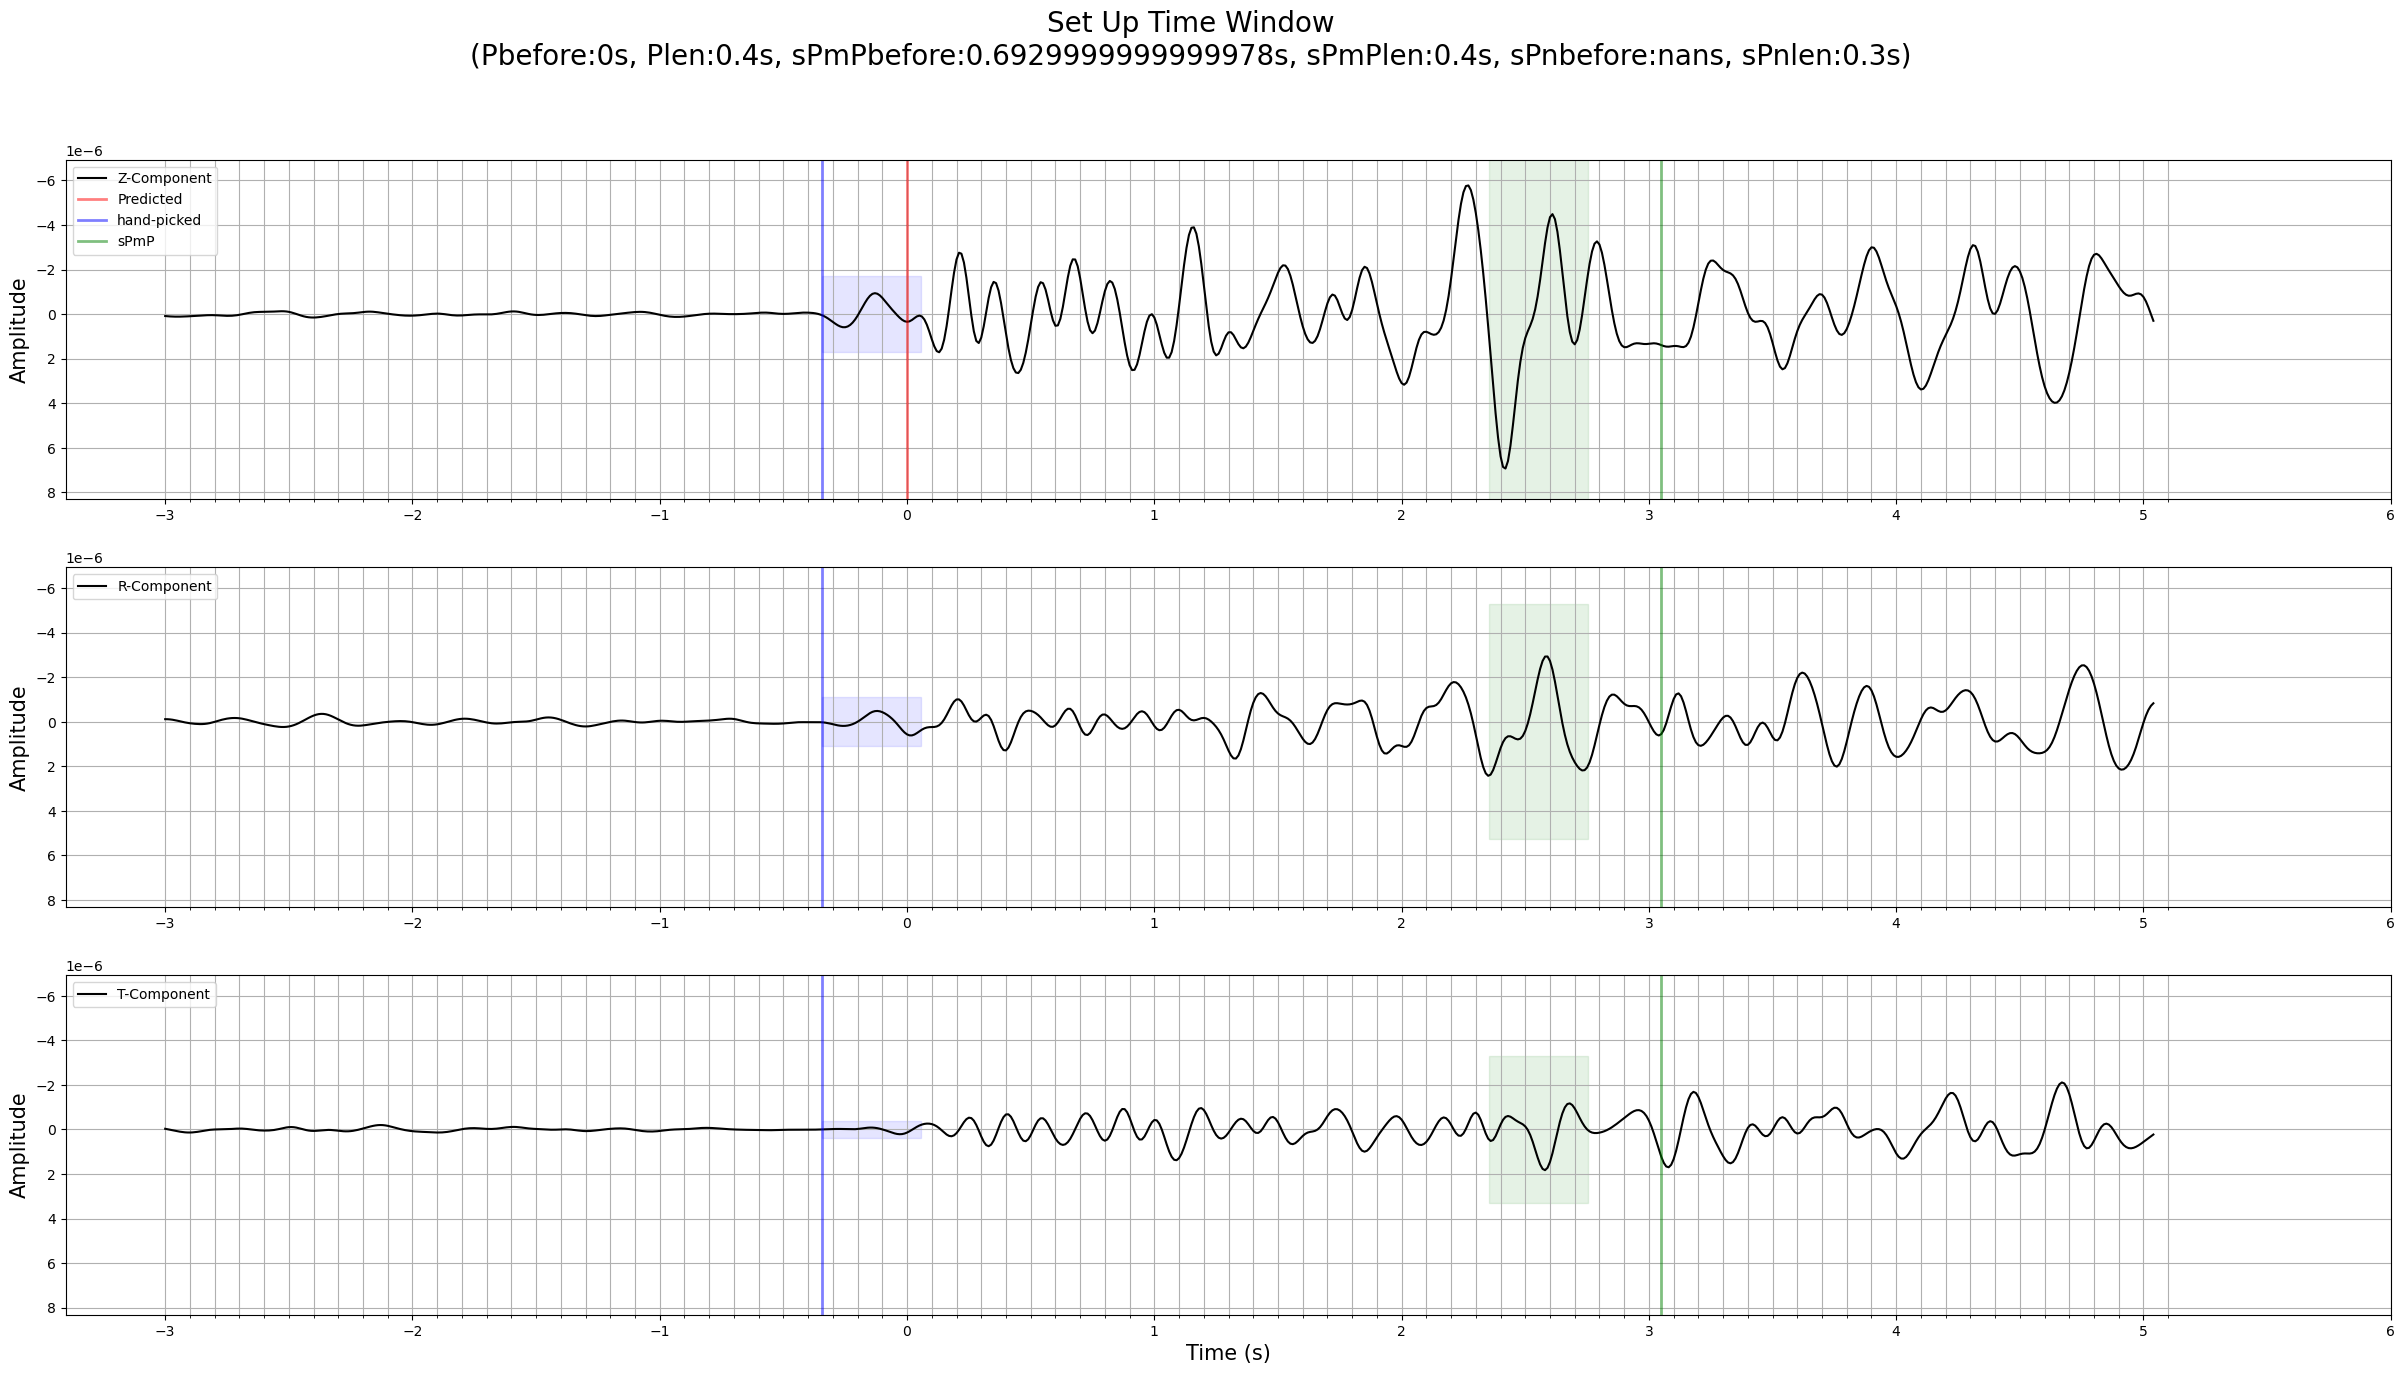

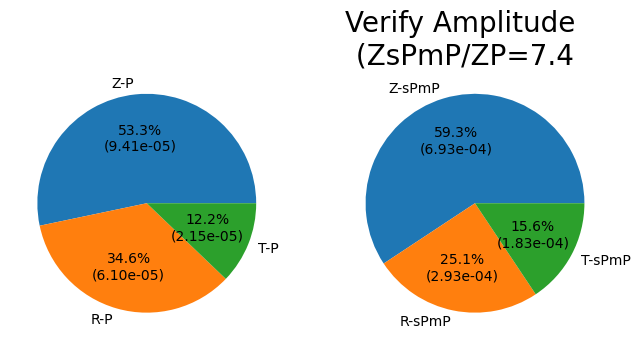

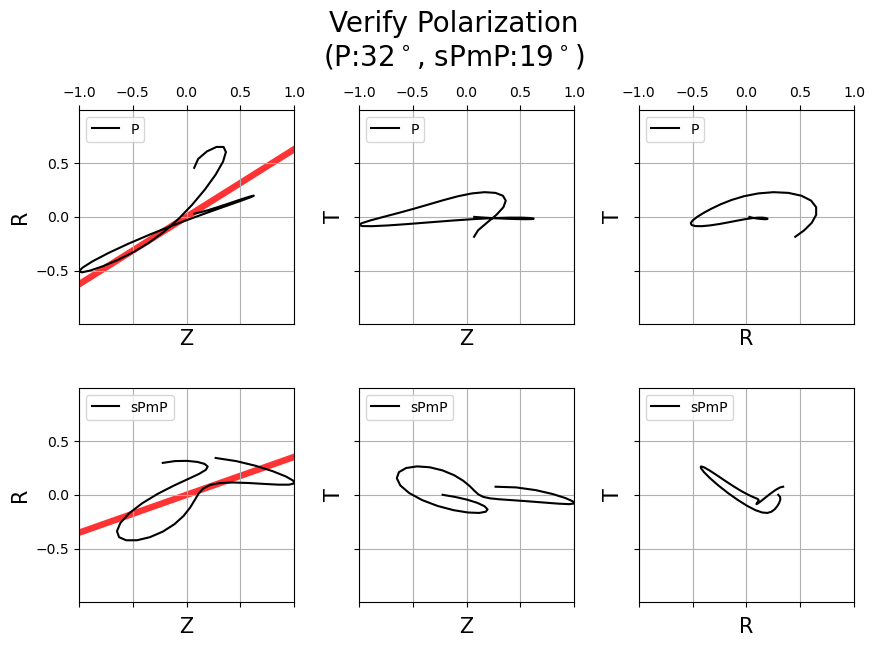

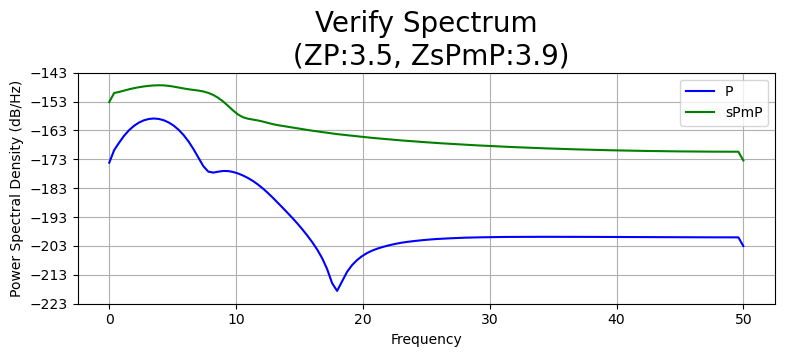

In [19]:
evtid =13

with open(f"{ddir}/judge/combined.txt","r") as files:
    #print("something")
    for i,file in enumerate(files):
        if i == evtid - 1:
            wave = file.split(" ")
            evt = wave[0]
            sta = wave[1]
            Tp = float(wave[2])
            TsPmP = float(wave[3])
            try: 
                TsPn = float(wave[4])
            except:
                TsPn = float("nan")
            
inpath = os.path.join(data_sac, evt)
os.chdir(inpath)
#print(glob.glob(f"{sta}*[RTZ].SAC.bp.cut"))

st = obspy.read(f"{sta}*[RTZ].SAC.bp.cut")
#print(len(st[2].data))
#st.plot()
sachd = st[0].stats.sac
p_len = 0.4
sPmP_len = 0.4
sPn_len = 0.3
SRsPmP = 1
SRsPn = 1
snr = 20
# Tp = -st[0].stats.sac.o-0.4
# TsPmP = 4.7
# TsPn = float("nan")

results = auto_filter(st, Tp, p_len, sPmP_len, sPn_len, SRsPmP, SRsPn, snr)
print(results)
if results != False:
    print("auto_filter")
    Tp, p_len, PTsPmP, TsPmP_autorefined, sPmP_len, PTsPn, sPn_len, TsPn_autorefined = results
    plot_graphs(st, Tp, TsPmP, TsPn, p_len, sPmP_len, sPn_len, TsPmP_autorefined, TsPn_autorefined)
else: 
    print("no signal found")
    plot_graphs(st, Tp, TsPmP, TsPn, p_len, sPmP_len, sPn_len, TsPmP, TsPn)



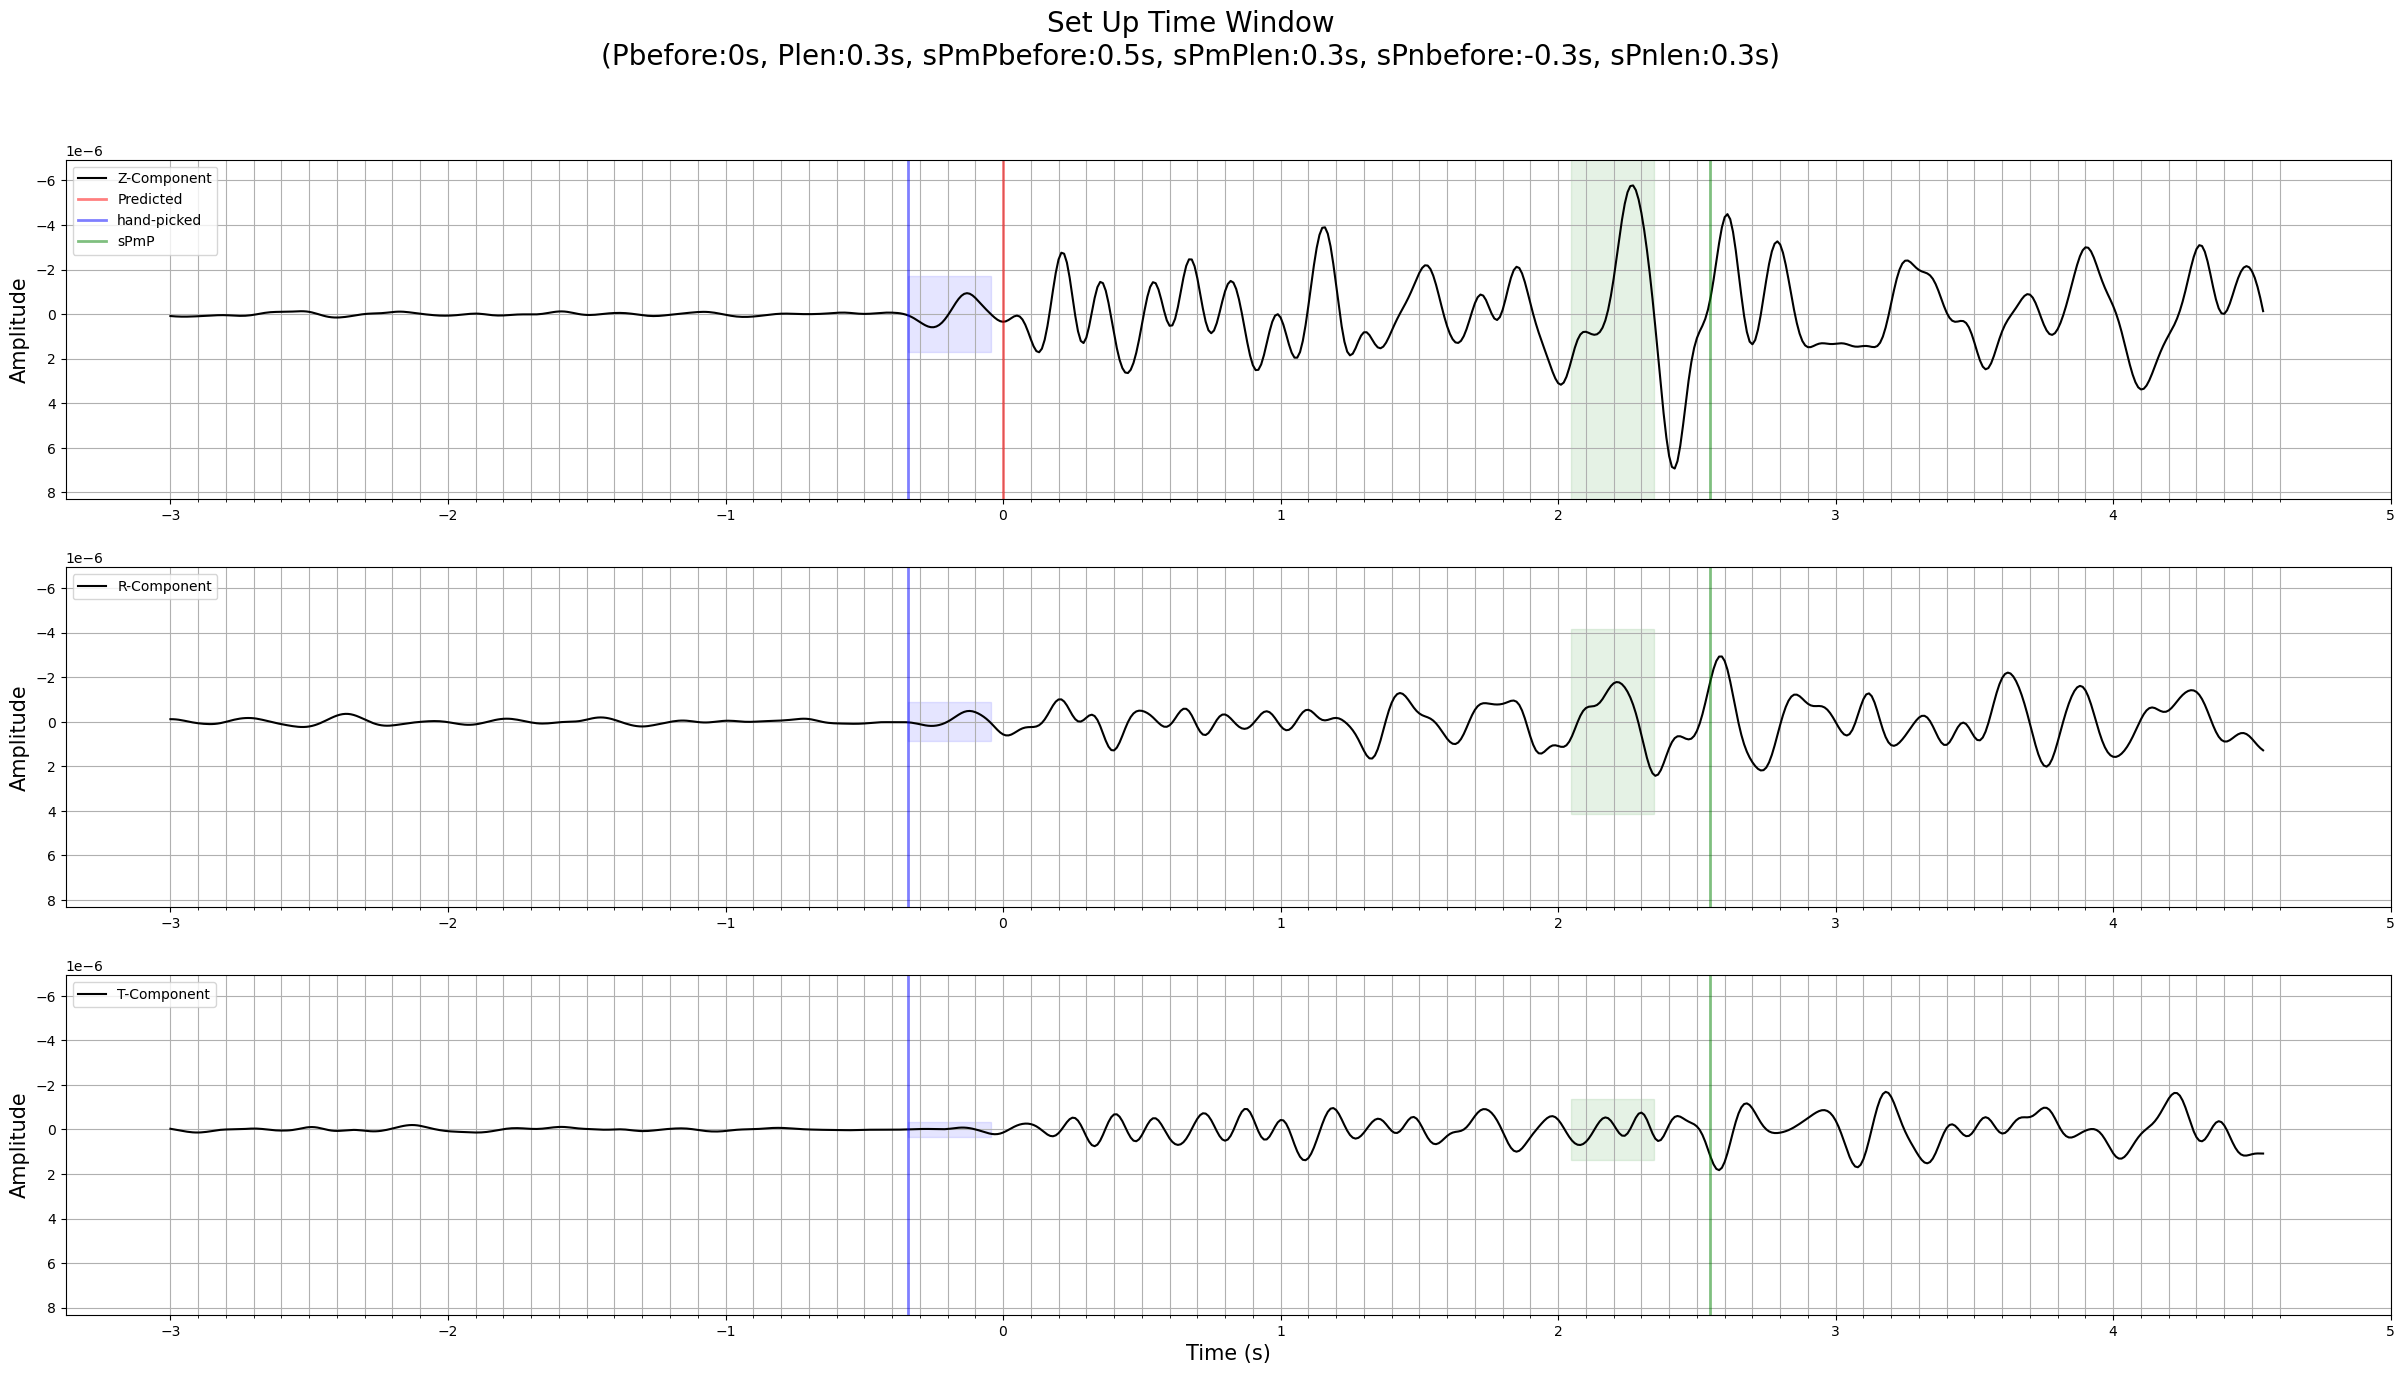

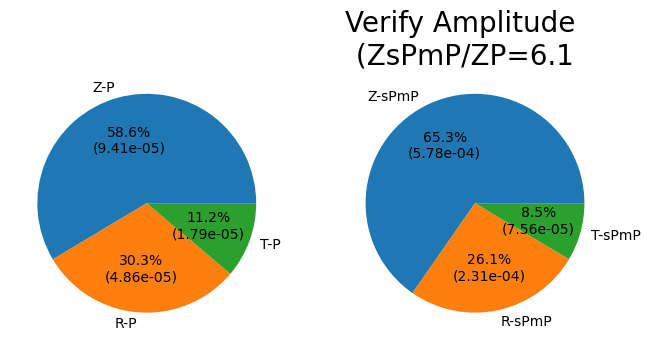

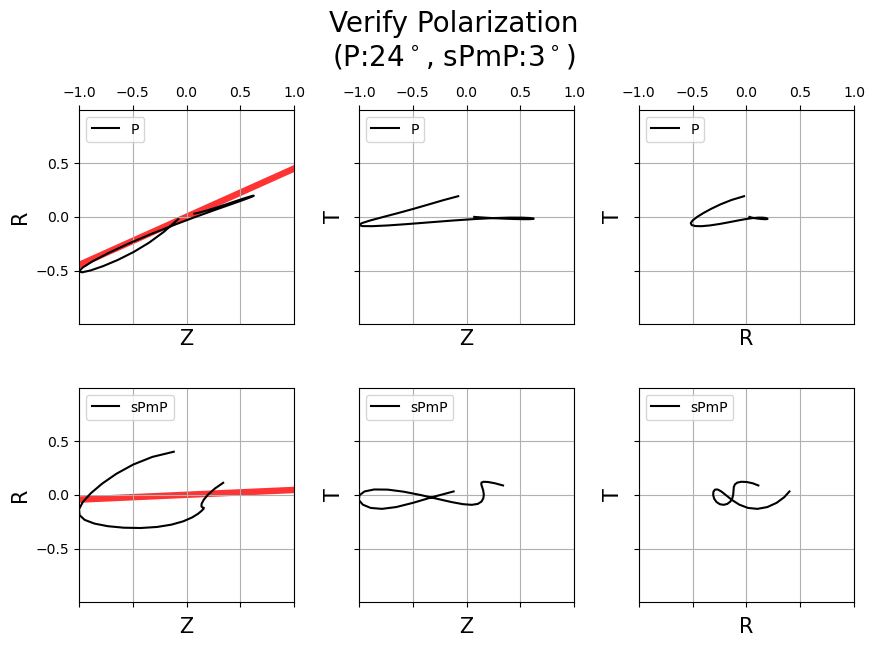

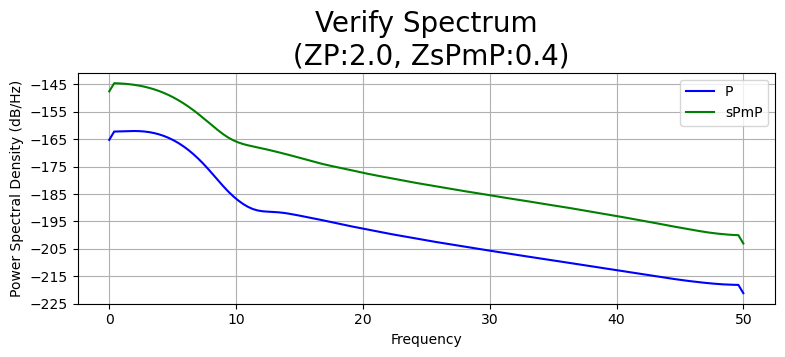

20220214164135260 CI.PSR.
check: 1.Amplitude ratio, 2. Minimal T direction energy, 3. Particle Motion
0


AttributeError: 'NoneType' object has no attribute 'endStream'

In [23]:
### tune these parameters to set proper windows
Tspnbefore = -0.3 #TsPn-float(TsPn_autorefined)
Tspmbefore = 0.5 #+TsPmP-float(TsPmP_autorefined)
Tplen = 0.3

Tspmlen = 0.3 #sPmP_len
Tspnlen = 0.3#sPn_len
Tpbefore = 0

fig1 = set_window(st, Tp, TsPmP, TsPn, Twbefore=3, Twafter=2, Tpbefore=Tpbefore, Tplen=Tplen, 
                  Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)

fig2 = vef_amp(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
fig3 = vef_polaz(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
fig4 = vef_sptm(st, Tp, TsPmP, TsPn, PN=2**8, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)

print(evt, sta)
print("check: 1.Amplitude ratio, 2. Minimal T direction energy, 3. Particle Motion")
score = 0
score = input("overall score: a(4 checks), b(3 checks), c(2 checks)")
if not os.path.exists(f"{wdir}/{evt}"):
    os.mkdir(f"{wdir}/{evt}")
if score == "a": 
    if not os.path.exists(f"{wdir}/{evt}/A"):
        os.mkdir(f"{wdir}/{evt}/A")

    pdf = PdfPages(f"{wdir}/{evt}/A/{sta}_analyses.pdf")
elif score == "b":
    if not os.path.exists(f"{wdir}/{evt}/B"):
        os.mkdir(f"{wdir}/{evt}/B")

    pdf = PdfPages(f"{wdir}/{evt}/B/{sta}_analyses.pdf")
elif score == 'c':
    if not os.path.exists(f"{wdir}/{evt}/C"):
        os.mkdir(f"{wdir}/{evt}/C")

    pdf = PdfPages(f"{wdir}/{evt}/C/{sta}_analyses.pdf")

print(score)

if score != 0:
    pdf.savefig(fig1)
    pdf.savefig(fig2)
    pdf.savefig(fig3)
    pdf.savefig(fig4)
    pdf.close()
    event_id = getEvtID(evt)
    TsPmP_adjusted = TsPmP - Tspmbefore
    TsPn = round(TsPn - Tspnbefore, 3)
    Tp_adjusted = Tp - Tpbefore

    os.chdir(f"{wdir}")
    file = open(f"{wdir}/verified.txt", "a")
    file.write("{}, {}, {:.3g}, {}, {:.3g}, {}, {:.3g}, {}, {}, {} \n".format(event_id, 
                                                           sta, Tp_adjusted, p_len, TsPmP_adjusted, 
                                                                  sPmP_len, TsPn, sPn_len, score, evt))
    file.close()